In [63]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [64]:
#import the dataset
data = pd.read_csv('C:/Users/avgon/Desktop/go_track_tracks.csv')
data.head(10)

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN
5,10,2,1.346913,0.006682,0.009,2,0,0,1,NaN
6,11,3,36.850787,0.228001,8.402,3,0,0,1,NaN
7,12,1,17.405131,0.038782,0.675,3,0,0,2,NaN
8,13,1,15.395436,0.526844,8.111,3,0,0,2,NaN
9,14,1,8.902729,0.003033,0.027,2,0,0,2,NaN


Select all four features (distance, speed, time, and rating) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on data, and the column index (2,3,4,5) for the above four columns are used, as shown below:

In [65]:
x = data.iloc[:, [2,3,4,5]].values

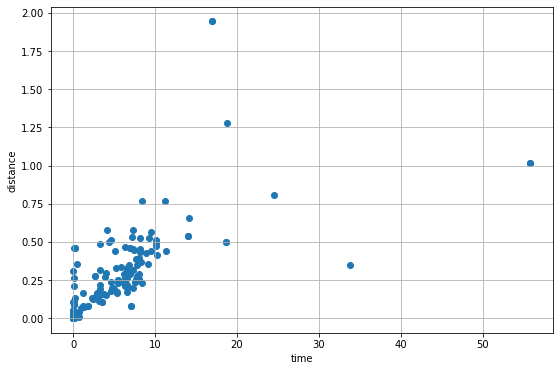

In [66]:
# Two features: distance travelled and time (distance/time)
plt.figure(figsize=(9, 6))
plt.scatter(data['distance'], data['time'])
plt.xlabel('time')
plt.ylabel('distance')
plt.grid()

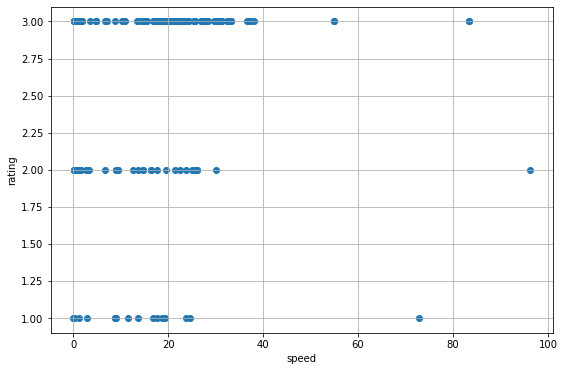

In [67]:
# Two features: speedd and rating(speed/rating)
plt.figure(figsize=(9, 6))
plt.scatter(data['speed'], data['rating'])
plt.xlabel('speed')
plt.ylabel('rating')
plt.grid()

In [68]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data[['distance', 'time']].values
X = scaler.fit_transform(X)

To start, let’s arbitrarily assign the value of k as 5. We will implement k-means clustering using k=5. For this we will instantiate the KMeans class and assign it to the variable kmeans5:


In [69]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 1 2 2 1 0 1 2 2 0 2 2 2 2 0 0 2 2 2 2 2 2 0 4 4 2 2 2 2 2 2 1 2 2 1 1 2
 2 1 2 1 1 1 3 0 3 3 3 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 1 1 1 1 1 1 0 0 0 0
 2 2 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 2 2 0 2 2 2 2 1 0 2 2 2 2 1
 2 0 2 0 0 0 0 0 0 2 0 2 0 0 1 1 0 2 2 1 0 1 2 1 2 2 0 0 1 1 2 0 0 0 0 2 2
 0 0 1 1 1 1 1 2 2 1 1 1 0 0 0]


array([[ 2.26303039,  0.10654007,  0.4108    ,  2.35      ],
       [29.45149475,  0.27743169,  8.13611429,  2.77142857],
       [17.91140647,  0.39384699,  6.37079032,  2.53225806],
       [83.94726336,  0.1317984 , 12.088     ,  2.25      ],
       [54.99594732,  1.01407472, 55.77      ,  3.        ]])

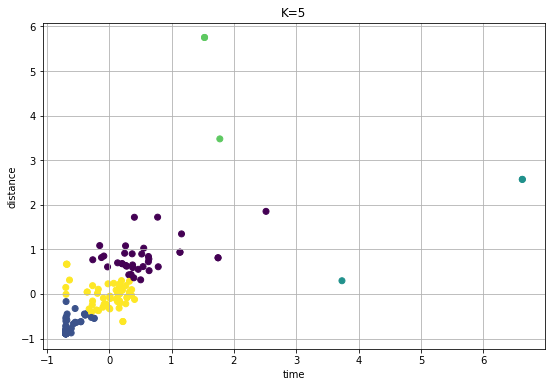

In [70]:
kmeans_5 = KMeans(n_clusters=5)
kmeans_5_pred = kmeans_5.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_5_pred)
plt.xlabel('time')
plt.ylabel('distance')
plt.title('K=5')
plt.grid()

The Elbow method is designed to help find the optimal number of clusters in a dataset. We will use this method to calculate the optimum value of k.We will plot a graph between the number of clusters and the corresponding error value.


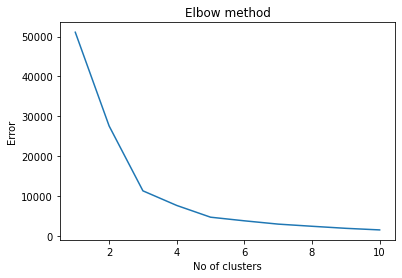

In [71]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
Lets implement k-means again using k=3

In [72]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 2 2 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 0 2 2 2 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0]


array([[ 3.02404178,  0.17987678,  1.15501515,  2.31818182],
       [22.82972069,  0.31482593,  6.90296703,  2.65934066],
       [74.29682468,  0.42589051, 26.64866667,  2.5       ]])

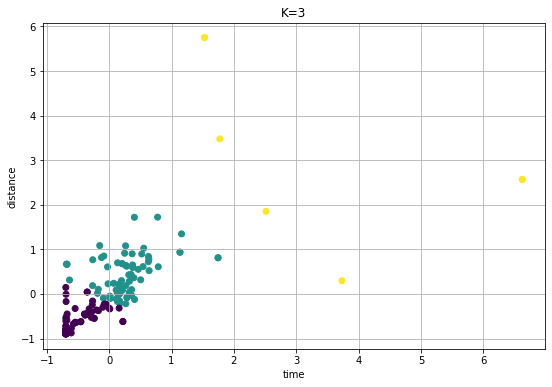

In [73]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3_pred = kmeans_3.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_3_pred)
plt.xlabel('time')
plt.ylabel('distance')
plt.title('K=3')
plt.grid()

Finally, its time to visualize the three clusters that were formed with the optimal k value. We can clearly see three clusters in the image below, with each cluster represented by a different color.

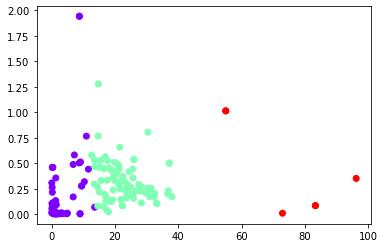

In [74]:
plt.scatter(x[:,0], x[:, 1], c=y_kmeans3, cmap='rainbow')

Cluster sizes interpretation


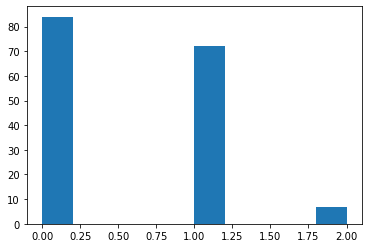

In [75]:
plt.figure()
plt.hist(kmeans_3_pred)
plt.show()